In [1]:
# Version: 0.0.1
# Date:    2022-07-22
# Author:  P. J. Vetter, Timo Joas
# Email=  philipp.vetter@uni-ulm.de;

In [2]:
# Simulation to investigate the robustness of the optimal control pulse. 
# Pulse units are abstracted away by imported ArbPulse class

# The oc_element function reads in the pulse files and creates the corresponding pulse

# all possible initial states are defined in the 'Initial State' section
# density matrix of the m_s = 0 state: rho_ms0 
# density matrix of the m_s = -1 state: rho_msm1
# density matrix of the x state: rho_x
# density matrix of the y state: rho_y

# (The first run might take a bit longer due to the plot generation)

# Packages

In [1]:
import os
os.getcwd()

'C:\\Software\\qudi\\user_scripts\\Timo\\own\\optimalcontrol'

In [2]:
#%matplotlib notebook
#%matplotlib notebook

import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy import interpolate
import matplotlib as mpl

from oc_simlib import TimeDependentSimulation, SimParameters, ArbPulse, PredefinedArbPulses



# Library

# Variables

In [3]:
# magnetic field [G]
B = 90

## Load pulses

In [21]:



folder = r"input_pulses\rect"
name = "rec_amp_20MHz_0.025mus_"
pulse = ArbPulse.load_pulse(folder, name, unit_t='µs', unit_data='MHz')

#folder = r"input_pulses"
#name = "on_nv=2_"

folder = r"input_pulses\20220727_1_guessFromReisserMsc"
name = "opt_res_"
pulse = ArbPulse.load_pulse(folder, name, unit_t='s', unit_data='V', func_p_v_2_omega_mhz=lambda x: x/0.25*20)


folder = r"input_pulses\Reisser_MSc_pulse_1"
name = "Opt_Pulse_01_"
pulse = ArbPulse.load_pulse(folder, name, unit_t='ns', unit_data='MHz')


# loading experimental pulse
# 0.25 = 20 MHz
#pulse = ArbPulse.load_pulse(folder, name, unit_t='s',  func_p_v_2_omega_mhz=lambda x: x/0.25*20)


#pulse = TimeDependentSimulation.load_pulse(folder, name, func_t_2_us=lambda t: t*1e6)
#
pulse.as_dict()




{'name': 'Opt_Pulse_01_',
 'folder': 'input_pulses\\Reisser_MSc_pulse_1',
 'file': ['C:\\Users\\Setup3-PC\\Desktop\\qudi\\user_scripts\\Timo\\own\\optimalcontrol\\input_pulses\\Reisser_MSc_pulse_1\\Opt_Pulse_01_amplitude.txt',
  'C:\\Users\\Setup3-PC\\Desktop\\qudi\\user_scripts\\Timo\\own\\optimalcontrol\\input_pulses\\Reisser_MSc_pulse_1\\Opt_Pulse_01_phase.txt'],
 'timegrid_unit': 'ns',
 'data_unit': 'MHz',
 'data_ampl': array([8.43960146, 8.42900726, 8.41821439, ..., 1.49992417, 1.47126339,
        1.44279013]),
 'data_phase': array([0., 0., 0., ..., 0., 0., 0.]),
 'timegrid_ampl': array([0.00000000e+00, 5.00250125e-02, 1.00050025e-01, ...,
        9.98999500e+01, 9.99499750e+01, 1.00000000e+02]),
 'timegrid_phase': array([0.00000000e+00, 5.00250125e-02, 1.00050025e-01, ...,
        9.98999500e+01, 9.99499750e+01, 1.00000000e+02])}

In [13]:
pulse.timegrid

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026])

In [14]:
pulse.data_ampl, pulse.data_unit

(array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 'V')

In [15]:
pulse.as_dict()

{'name': 'rec_amp_20MHz_0.025mus_',
 'folder': 'input_pulses\\rect',
 'file': ['C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\rect\\rec_amp_20MHz_0.025mus_amplitude.txt',
  'C:\\Users\\Timo\\OneDrive\\_Promotion\\Software\\Simulations\\202207_OC_Pulses_Philipp\\oc_pulse_analysis\\input_pulses\\rect\\rec_amp_20MHz_0.025mus_phase.txt'],
 'timegrid_unit': 's',
 'data_unit': 'V',
 'data_ampl': array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 'data_phase': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'timegrid_ampl': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
        0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
        0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026]),
 'timegrid_phase': array

In [16]:
len(pulse.as_dict()['timegrid_ampl'])

26

## Generate pulses

In [4]:

pulse = PredefinedArbPulses.generate_levitt(20e6, phase=0)
#pulse = PredefinedArbPulses.generate_rect_pi(20e6, phase=0)

#pulse['data_phase']
#val_i, val_q = np.asarray([1,0])*1
#np.asarray([np.pi/2, 0, np.pi/2]) + 0

#data_ampl = np.asarray([0,0,0])
#data_ampl[0:3] = 1
#data_ampl

## Plot pulses

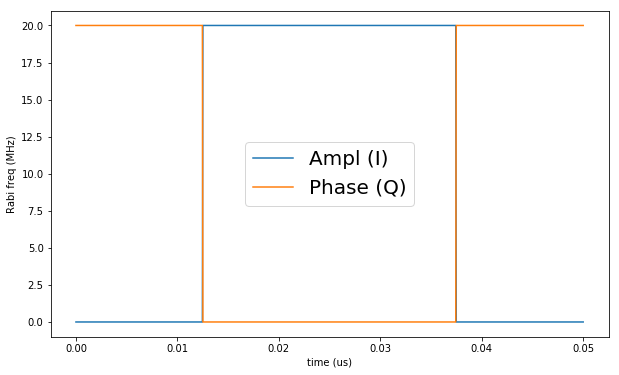

In [5]:
import matplotlib.pyplot as plt
    
t_amplitude = pulse.get_timegrid(unit='µs')
amplitude = pulse.get_data_ampl(unit='MHz')
t_phase = pulse.get_timegrid(unit='µs')
phase = pulse.get_data_phase(unit='MHz')

try:
    plt.figure(figsize=(10,6))
    plt.plot(t_amplitude, amplitude, label="Ampl (I)")
    plt.plot(t_phase, phase, label="Phase (Q)")
   # plt.plot(t_phase, phase+amplitude, label="I+Q")
    plt.ylabel("Rabi freq (MHz)")
    plt.xlabel("time (us)")
    plt.legend(loc='best', prop={'size': 20})
    plt.show()
except:
    logger.exception("")

# Parameters, Operators

In [14]:

simp = SimParameters()
simp.gamma_nv

2.8

# Measurements

## Frequency Detuning

In [23]:

B = 86.07
df = 50 # MHz
n_f = np.min([int(df/0.25), 500])
f_mw = simp.gamma_nv * B
f_block = 2710 # MHz
df_block = 10

sim = TimeDependentSimulation()

freq_array = np.linspace(simp.D - simp.gamma_nv * B - df, simp.D - simp.gamma_nv * B + df, n_f)
#freq_array = np.linspace(2710-10, 2710+10, 50)
data_freq_detuning = sim.run_sim_fsweep(freq_array, pulse, B, simp)

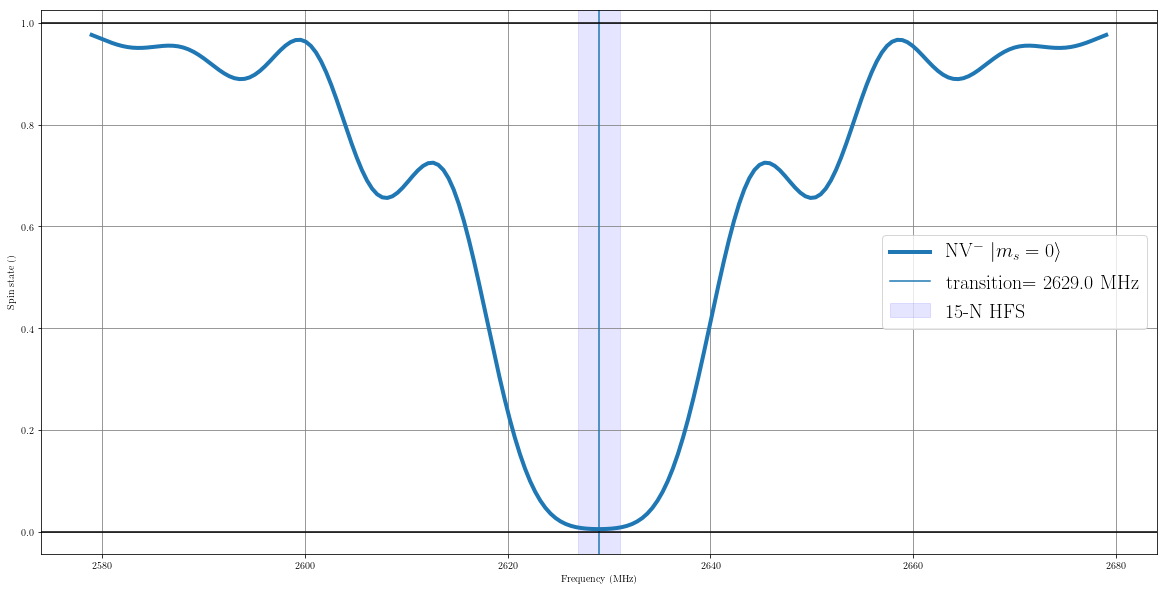

In [24]:
f_mw = simp.D - simp.gamma_nv * B

# visualize the results
fig1, ax = plt.subplots(figsize=(20,10))
ax.plot(freq_array, data_freq_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')

ax.axvline(f_mw, label=f"transition= {f_mw:.1f} MHz")
ax.axvspan(f_mw-2.1, f_mw+2.1, alpha=0.1, color='blue', label='15-N HFS')


# blockband
if f_mw + df >= f_block: 
    ax.axvline(f_block, label=f"NV1 blockband (2710 +- {df_block} MHz)", color='red')
    ax.axvspan(f_block-df_block, f_block+df_block, alpha=0.1, color='red')
# grid
ax.axhline(0, color='black')
ax.axhline(1, color='black')
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')



ax.set_xlabel(r'Frequency (MHz)')
ax.set_ylabel(r'Spin state ()')
ax.legend(loc='best', prop={'size': 20})
plt.show(fig1)

## Amplitude Error

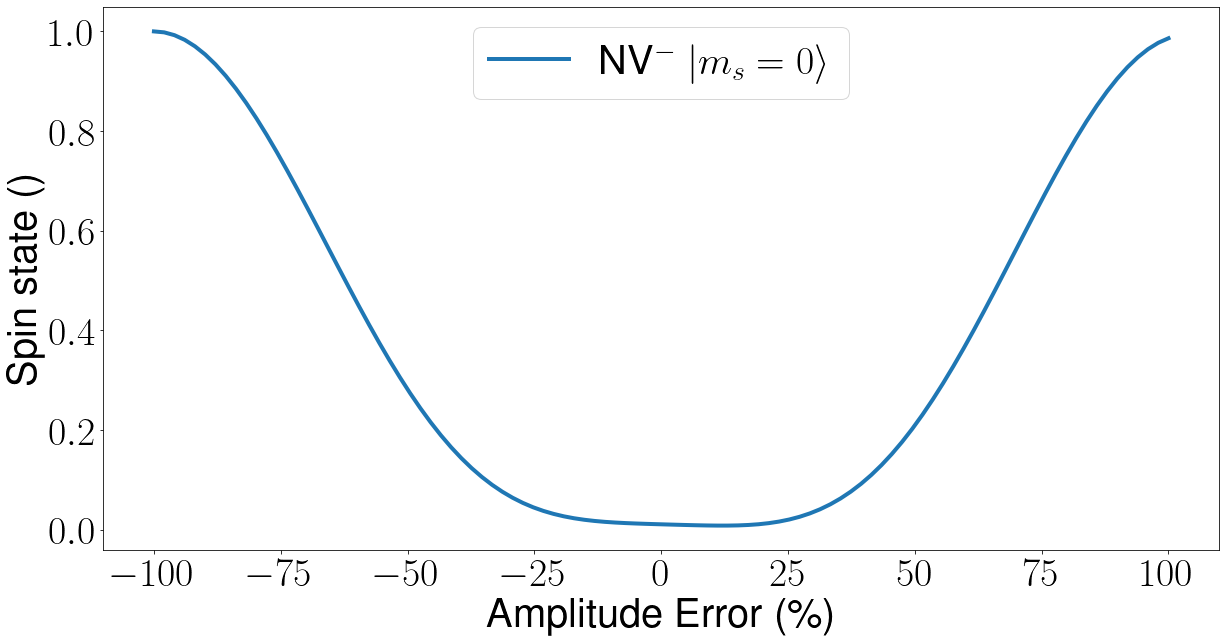

In [10]:
B= 90 #gauss

sim = TimeDependentSimulation()

# scanned amplitude steps
amp_array = np.linspace(-1, 1, 100)
data_amp_detuning = sim.run_sim_ampsweep(amp_array, pulse, B, simp)

# visualize the results
fig2, ax = plt.subplots(figsize=(20,10))
ax.plot(amp_array*100, data_amp_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')
ax.set_xlabel(r'Amplitude Error (\%)')
ax.set_ylabel(r'Spin state ()')
ax.legend(loc='best')
plt.show(fig2) 